In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


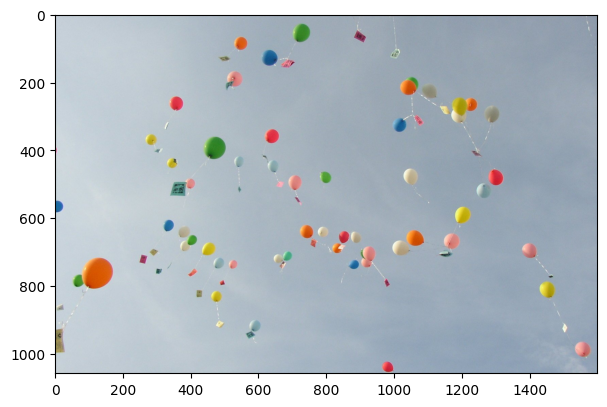

In [3]:
import skimage as sk
from skimage import io
import matplotlib.pyplot as plt


I = sk.io.imread('/content/drive/MyDrive/Computer_Vision/baloons.jpg/')

fig = plt.figure(figsize=(7,7))
plt.imshow(I)
plt.show()

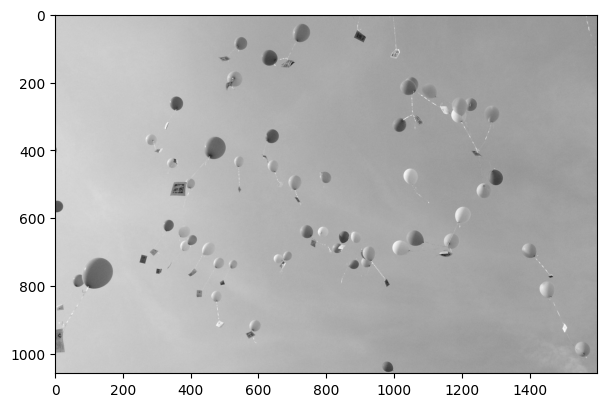

In [4]:
from skimage.color import rgb2gray

IG = rgb2gray(I)

fig = plt.figure(figsize=(7,7))
plt.imshow(IG, cmap='gray')
plt.show()

In [5]:
IG.shape

(1058, 1600)

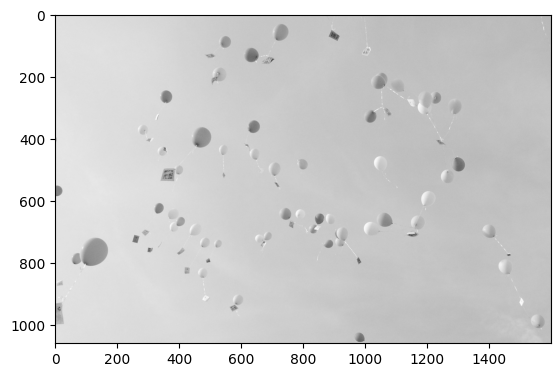

In [6]:
from skimage import exposure

IGC = exposure.adjust_gamma(IG, 0.5)
plt.imshow(IGC,cmap='gray')

0.7109542057291668


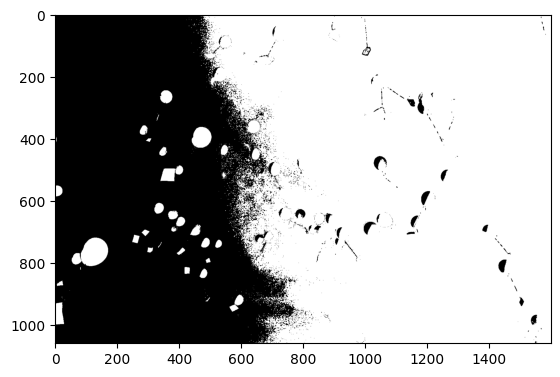

In [7]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(IG)
print(thresh)

IG_bw = IG < thresh
plt.imshow(IG_bw, cmap='gray')

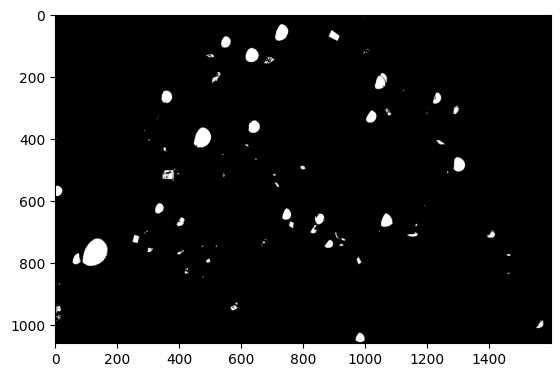

In [8]:
IGC_bw = IGC < thresh
plt.imshow(IGC_bw, cmap='gray')

Number of regions is 177


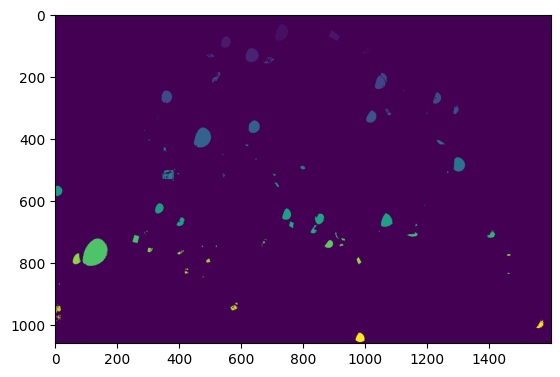

In [9]:
from skimage.measure import label

#IGC_bw -> segmented image
label_image, nregions = label(IGC_bw,return_num = True)

plt.imshow(label_image)
print('Number of regions is {}'.format(nregions))

In [17]:
from skimage.measure import regionprops,regionprops_table
import numpy as np
import pandas as pd

# props = regionprops(label_image)
# features = np.zeros((nregions,3))

# for i in range(0,nregions):
#   features[i,0] = int(i) + 1
#   features[i,1] = props[i].area
#   features[i,2] = props[i].eccentricity

# df = pd.DataFrame(features, columns=['label','area','eccentricity'])
# df.head()

props = regionprops_table(label_image,properties=['label','area','eccentricity'])
df_features = pd.DataFrame(props)
df_features.head()

,label,area,eccentricity
0,1,28.0,0.964091
1,2,39.0,0.983702
2,3,4.0,1.000000
3,4,6.0,1.000000
4,5,3.0,1.000000


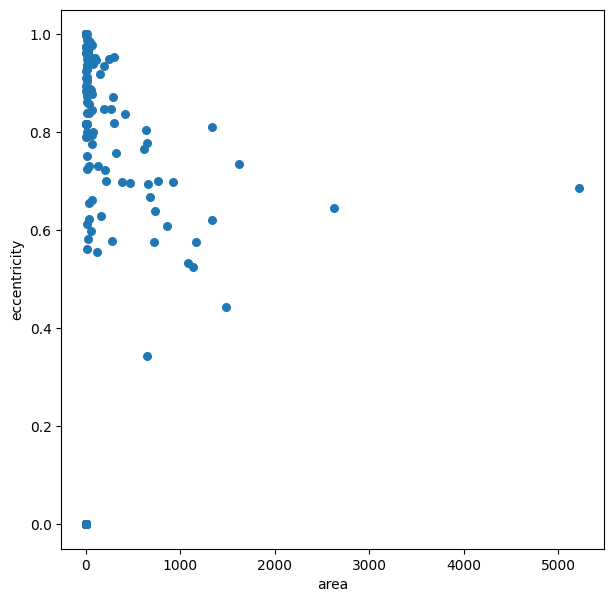

In [22]:
fig = plt.figure(figsize=(7,7))
plt.scatter(df_features['area'],df_features['eccentricity'],s=30,marker='o')
plt.xlabel('area')
plt.ylabel('eccentricity')
plt.show()

# import seaborn as sns
# sns.scatterplot(x='area',y='eccentricity',data=df_features)

In [24]:
required_balloons = np.where((df_features['area'] > 500) & (df_features['eccentricity'] < 0.8))[0]  # np.where return a tuple but we take only the array with indexes

balloons = np.array(required_balloons)+1

print(balloons)

# df_balloons = df_features.loc[(df_features['area']>500) & (df_features['eccentricity']<0.8)]

# df_balloons.head()
# print('number of idenfitied balloons is {}'.format(df_balloons.shape[0]))
# indx_balloons = df_balloons['label'].values
# indx_balloons

[  7  11  13  17  40  47  55  56  68  77  97  98 100 101 102 128 146 177]


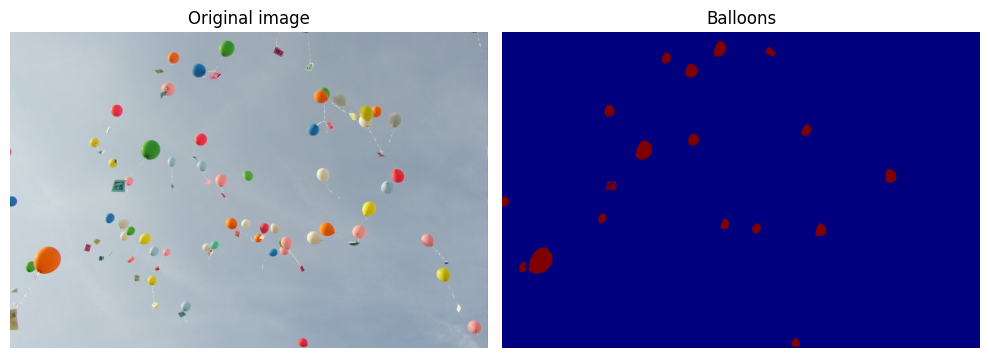

In [25]:
mask_balloons = np.zeros_like(label_image, dtype=np.uint8)

for idx in required_balloons:
  mask_balloons[label_image == (idx+1)] = 1 #+1 because required_ballons starts from 0

fig, axes = plt.subplots(1,2,figsize=(10, 7))
ax = axes.ravel()
ax[0].imshow(I)
ax[0].set_title('Original image')
ax[1].imshow(mask_balloons,cmap=plt.cm.jet)
ax[1].set_title('Balloons') # set figure title
ax[0].set_axis_off()
ax[1].set_axis_off()
plt.tight_layout()
plt.show()

In [ ]:
# import numpy as np
# mask_balloons = np.isin(label_image,indx_balloons)


# Get some figures:
# fig, axes = plt.subplots(1,2,figsize=(14, 9))
# ax = axes.ravel()
# ax[0].imshow(I)
# ax[0].set_title('Original image')
# ax[1].imshow(mask_balloons,cmap=plt.cm.jet)
# ax[1].set_title('Balloons') # set figure title
# ax[0].set_axis_off()
# ax[1].set_axis_off()
# plt.tight_layout()
# plt.show()